In [2]:
import tensorflow as tf

#building graph

# 10x10 image [batch size, width, height, number of channels]
input = tf.Variable(tf.random_normal([1, 10, 10, 1]))

# 3x3 filter [width, height, channels, number of filters]
filter = tf.Variable(tf.random_normal([3, 3, 1, 1]))

#  The input size without zero padding : input size - kernel dimension + 1 = 10 - 3 + 1 = 8 x 8
op = tf.nn.conv2d(input, filter, strides = [1, 1, 1, 1], padding = 'VALID')

# The output size for zero padding : same as input 10 x 10
op2 = tf.nn.conv2d(input, filter, strides = [1, 1, 1, 1], padding = 'SAME')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    print("Input \n")
    print('{0} \n'.format(input.eval()))
    
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[-1.19711590e+00]
   [ 2.92835385e-01]
   [-1.71059534e-01]
   [-3.66546035e-01]
   [-6.52294874e-01]
   [ 6.27963185e-01]
   [-8.27569216e-02]
   [-1.61817169e+00]
   [-1.38202697e-01]
   [-1.32561803e+00]]

  [[ 4.12485227e-02]
   [ 6.32213831e-01]
   [ 8.98646712e-01]
   [-8.14521611e-01]
   [ 1.97305307e-01]
   [-8.19717348e-01]
   [ 7.41654694e-01]
   [ 7.90250421e-01]
   [-1.07085323e+00]
   [-1.67370403e+00]]

  [[-1.65114492e-01]
   [ 2.64877528e-02]
   [ 1.00100435e-01]
   [ 9.51775730e-01]
   [ 5.35442710e-01]
   [-1.49266791e+00]
   [ 1.16321874e+00]
   [-8.98498237e-01]
   [-1.16375864e+00]
   [ 1.38385487e+00]]

  [[ 4.32909131e-01]
   [ 8.31184208e-01]
   [ 1.05958855e+00]
   [ 2.92582631e-01]
   [-3.83672953e-01]
   [-3.71368080e-02]
   [-3.56396943e-01]
   [ 4.76704389e-01]
   [-1.74351549e+00]
   [ 7.58305013e-01]]

  [[ 3.18672299e-01]
   [-5.36947906e-01]
   [-1.62882566e+00]
   [-1.11100733e+00]
   [-2.88459063e-01]
   [-1.24545228e+00]
   [-9.41946507e-0

In [4]:
##Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image


 Original type: <PIL.Image.Image image mode=L size=324x156 at 0x17B037374E0> 


After conversion to numerical representation: 

 array([[ 79,  79,  79, ..., 130, 129, 138],
       [ 62,  62,  62, ..., 124, 123, 132],
       [ 61,  60,  60, ..., 116, 115, 124],
       ...,
       [ 64,  64,  64, ..., 124, 122, 150],
       [ 64,  64,  64, ..., 100, 100, 129],
       [ 64,  64,  64, ...,  85,  85, 116]], dtype=uint8)

 Input image converted to gray scale: 



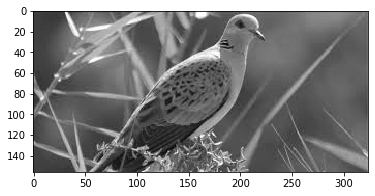

In [6]:
im = Image.open("C:/Users/sd16053/Pictures/bird.jpg")

#convert(L) translate colr images into black and white
image_gr = im.convert("L")
print("\n Original type: %r \n\n" % image_gr)

#convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" %arr)

#activating matplotlib for Ipython
%matplotlib inline

#plot image
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

In [8]:
# use kernel

kernel = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0],])

grad = signal.convolve2d(arr, kernel, mode = 'same', boundary = 'symm')

GRADIENT MAGNITUDE - feature map


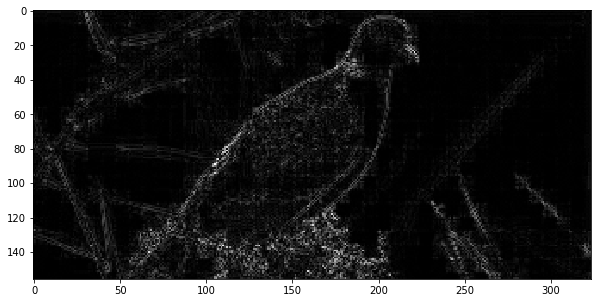

In [9]:
%matplotlib inline

print('GRADIENT MAGNITUDE - feature map')

fig, aux = plt.subplots(figsize = (10, 10))
aux.imshow(np.absolute(grad), cmap = 'gray')

In [10]:
type(grad)

grad_biases = np.absolute(grad) + 100
grad_biases[grad_biases > 255] = 255

GRADIENT MAGNITUDE - Feature map


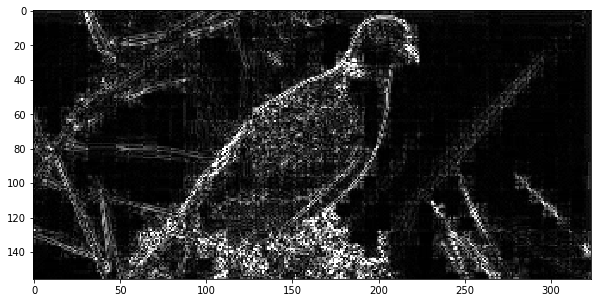

In [11]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')
fig, aux = plt.subplots(figsize = (10, 10))
aux.imshow(np.absolute(grad_biases), cmap = 'gray')